### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Reading excel file

In [2]:
df=pd.read_excel('Daily Mobile Usage.xlsx')
df.head()

,Date,Instagram,Whatsapp,Camera,Spotify,Teams,Phone,Youtube,Brave,Google,Clash Royale,Drive,Free Fire,Shadow Fight 4
0,2023-01-22,10.0,8,8.0,6.0,4.0,10,NaN,NaN,2.0,9.0,NaN,37,NaN
1,2023-01-23,103.0,6,NaN,NaN,1.0,4,NaN,1.0,5.0,NaN,4.0,42,NaN
2,2023-01-24,NaN,3,NaN,NaN,10.0,7,10.0,NaN,3.0,NaN,2.0,25,NaN
3,2023-01-25,NaN,25,NaN,NaN,6.0,5,NaN,51.0,16.0,10.0,NaN,54,NaN
4,2023-01-26,34.0,8,NaN,2.0,6.0,5,NaN,NaN,15.0,NaN,NaN,43,NaN


### Displaying columns

In [3]:
df.columns

Index(['Date', 'Instagram', 'Whatsapp', 'Camera', 'Spotify', 'Teams', 'Phone',
       'Youtube', 'Brave', 'Google', 'Clash Royale', 'Drive', 'Free Fire',
       'Shadow Fight 4'],
      dtype='object')

### Displaying column names with general info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            95 non-null     datetime64[ns]
 1   Instagram       90 non-null     float64       
 2   Whatsapp        95 non-null     int64         
 3   Camera          28 non-null     float64       
 4   Spotify         64 non-null     float64       
 5   Teams           79 non-null     float64       
 6   Phone           95 non-null     int64         
 7   Youtube         76 non-null     float64       
 8   Brave           88 non-null     float64       
 9   Google          93 non-null     float64       
 10  Clash Royale    42 non-null     float64       
 11  Drive           56 non-null     float64       
 12  Free Fire       95 non-null     int64         
 13  Shadow Fight 4  80 non-null     float64       
dtypes: datetime64[ns](1), float64(10), int64(3)
memory usage: 10

### Dimensions of dataframe

In [5]:
df.shape

(95, 14)

### Five number summary

In [6]:
# taking transpose as there are many columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Instagram,90.0,102.355556,59.770781,8.0,56.50,93.5,141.00,290.0
Whatsapp,95.0,19.536842,14.077151,3.0,9.00,17.0,27.50,84.0
Camera,28.0,6.214286,7.685278,1.0,2.75,4.0,8.00,41.0
Spotify,64.0,7.296875,5.789097,1.0,2.75,5.0,11.00,21.0
Teams,79.0,19.949367,29.130079,1.0,6.00,12.0,25.00,246.0
Phone,95.0,24.378947,17.278186,3.0,13.00,21.0,30.00,94.0
Youtube,76.0,39.881579,40.239273,3.0,11.75,25.0,51.25,199.0
Brave,88.0,14.704545,11.890457,1.0,7.00,11.0,19.00,54.0
Google,93.0,28.354839,28.065779,2.0,13.00,22.0,35.00,224.0
Clash Royale,42.0,11.523810,9.828376,2.0,5.00,8.0,14.75,52.0


###  Number of null values in each column

In [7]:
df.isna().sum()

Date               0
Instagram          5
Whatsapp           0
Camera            67
Spotify           31
Teams             16
Phone              0
Youtube           19
Brave              7
Google             2
Clash Royale      53
Drive             39
Free Fire          0
Shadow Fight 4    15
dtype: int64

### Total number of null values in dataframe

In [8]:
df.isna().sum().sum()

254

### Plotting density for columns containing null values 

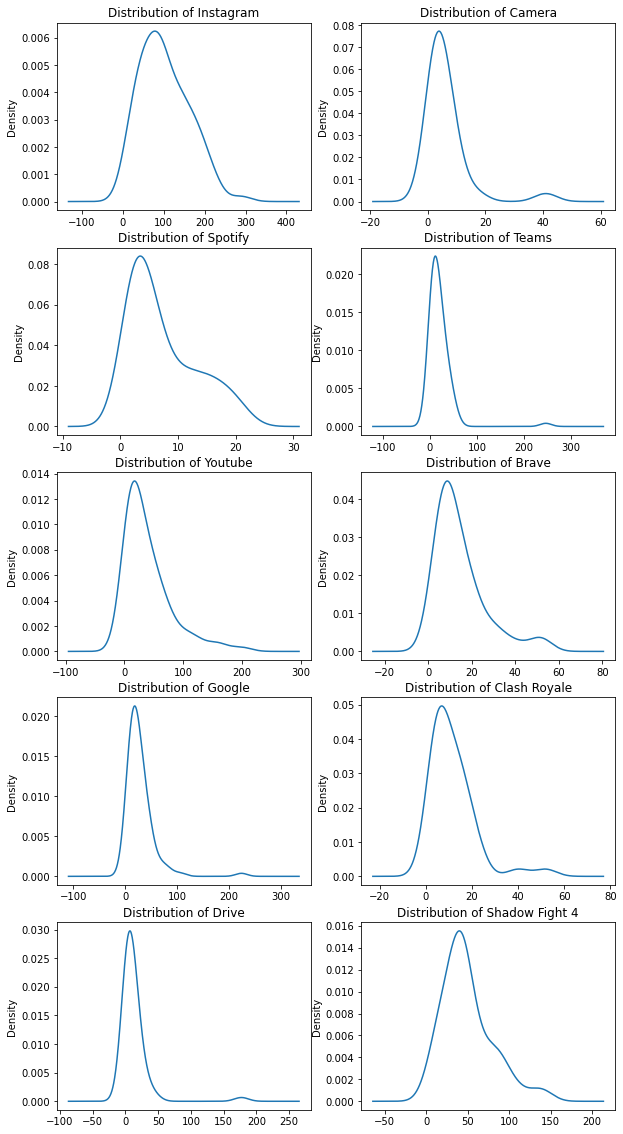

In [9]:
cols=['Instagram','Camera','Spotify','Teams','Youtube','Brave','Google','Clash Royale','Drive','Shadow Fight 4']
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

for i, col_name in enumerate(cols):
    ax = axes[i // 2, i % 2]
    df[col_name].plot(kind='kde', ax=ax)
    ax.set_ylabel('Density')
    ax.set_title(f'Distribution of {col_name}')
plt.show()

### Replacing null values with median of column

In [10]:
for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)

### Checking if all null values are replaced 

In [11]:
df.isna().sum()

Date              0
Instagram         0
Whatsapp          0
Camera            0
Spotify           0
Teams             0
Phone             0
Youtube           0
Brave             0
Google            0
Clash Royale      0
Drive             0
Free Fire         0
Shadow Fight 4    0
dtype: int64

In [12]:
df.head()

,Date,Instagram,Whatsapp,Camera,Spotify,Teams,Phone,Youtube,Brave,Google,Clash Royale,Drive,Free Fire,Shadow Fight 4
0,2023-01-22,10.0,8,8.0,6.0,4.0,10,25.0,11.0,2.0,9.0,7.0,37,43.5
1,2023-01-23,103.0,6,4.0,5.0,1.0,4,25.0,1.0,5.0,8.0,4.0,42,43.5
2,2023-01-24,93.5,3,4.0,5.0,10.0,7,10.0,11.0,3.0,8.0,2.0,25,43.5
3,2023-01-25,93.5,25,4.0,5.0,6.0,5,25.0,51.0,16.0,10.0,7.0,54,43.5
4,2023-01-26,34.0,8,4.0,2.0,6.0,5,25.0,11.0,15.0,8.0,7.0,43,43.5


### Creating thresholds for app usage

In [13]:
color_thresholds = {
    (4000, float('inf')): 'red',
    (2000, 4000): 'orange',
    (1000,2000):'yellow',
    (0, 1000): 'green'
}

### Plotting bar charts with percentage of total time

C:\Users\raksh\AppData\Local\Temp\ipykernel_3084\4024780498.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  app_time=df.sum()


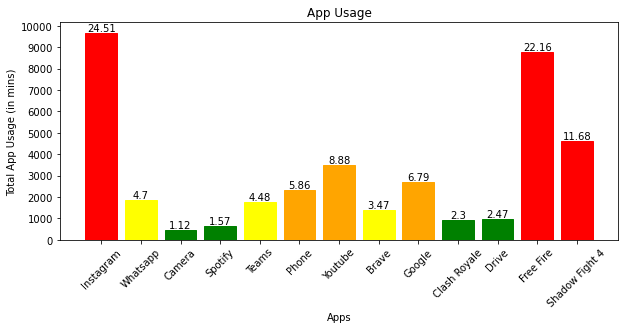

In [14]:
app_time=df.sum()
indices = range(len(app_time))
plt.figure(figsize=(10,4))
bars=plt.bar(indices, app_time, tick_label=app_time.index, align='center')
for i, bar in enumerate(bars):
    value = app_time[i]
    for (lower, upper), color in color_thresholds.items():
        if lower <= value < upper:
            bar.set_color(color)
            break

for i, bar in enumerate(bars):
    value = app_time[i]
    value=round(value*100/app_time.sum(),2)
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')
    
plt.xticks(rotation=45) #incline app names at 45 degrees
y_ticks = np.arange(0, max(app_time) + 1000, 1000)  # Generate ticks at intervals of 1000
plt.yticks(y_ticks)
plt.xlabel('Apps')
plt.ylabel('Total App Usage (in mins)')
plt.title('App Usage')
plt.show()

In [15]:
# Instagram, Free Fire and Shadow Fight 4 are the most used apps
# Youtube, Google and Phone are the next frequently used apps
# Whatsapp, Teams and Brave are moderately used apps
# Camera, Spotify, Drive and Clash Royale are the least used apps.

### Calculating total time per day 

In [16]:
df['Total_time']=df.iloc[:,1:14].sum(axis=1)

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Instagram,95.0,101.889474,58.193376,8.0,58.5,93.5,139.5,290.0
Whatsapp,95.0,19.536842,14.077151,3.0,9.0,17.0,27.5,84.0
Camera,95.0,4.652632,4.242060,1.0,4.0,4.0,4.0,41.0
Spotify,95.0,6.547368,4.861417,1.0,4.0,5.0,7.0,21.0
Teams,95.0,18.610526,26.703372,1.0,6.5,12.0,24.0,246.0
Phone,95.0,24.378947,17.278186,3.0,13.0,21.0,30.0,94.0
Youtube,95.0,36.905263,36.437961,3.0,14.0,25.0,45.5,199.0
Brave,95.0,14.431579,11.480467,1.0,7.0,11.0,18.5,54.0
Google,95.0,28.221053,27.780744,2.0,13.0,22.0,35.0,224.0
Clash Royale,95.0,9.557895,6.725176,2.0,8.0,8.0,8.0,52.0


### Plotting lineplot for all columns

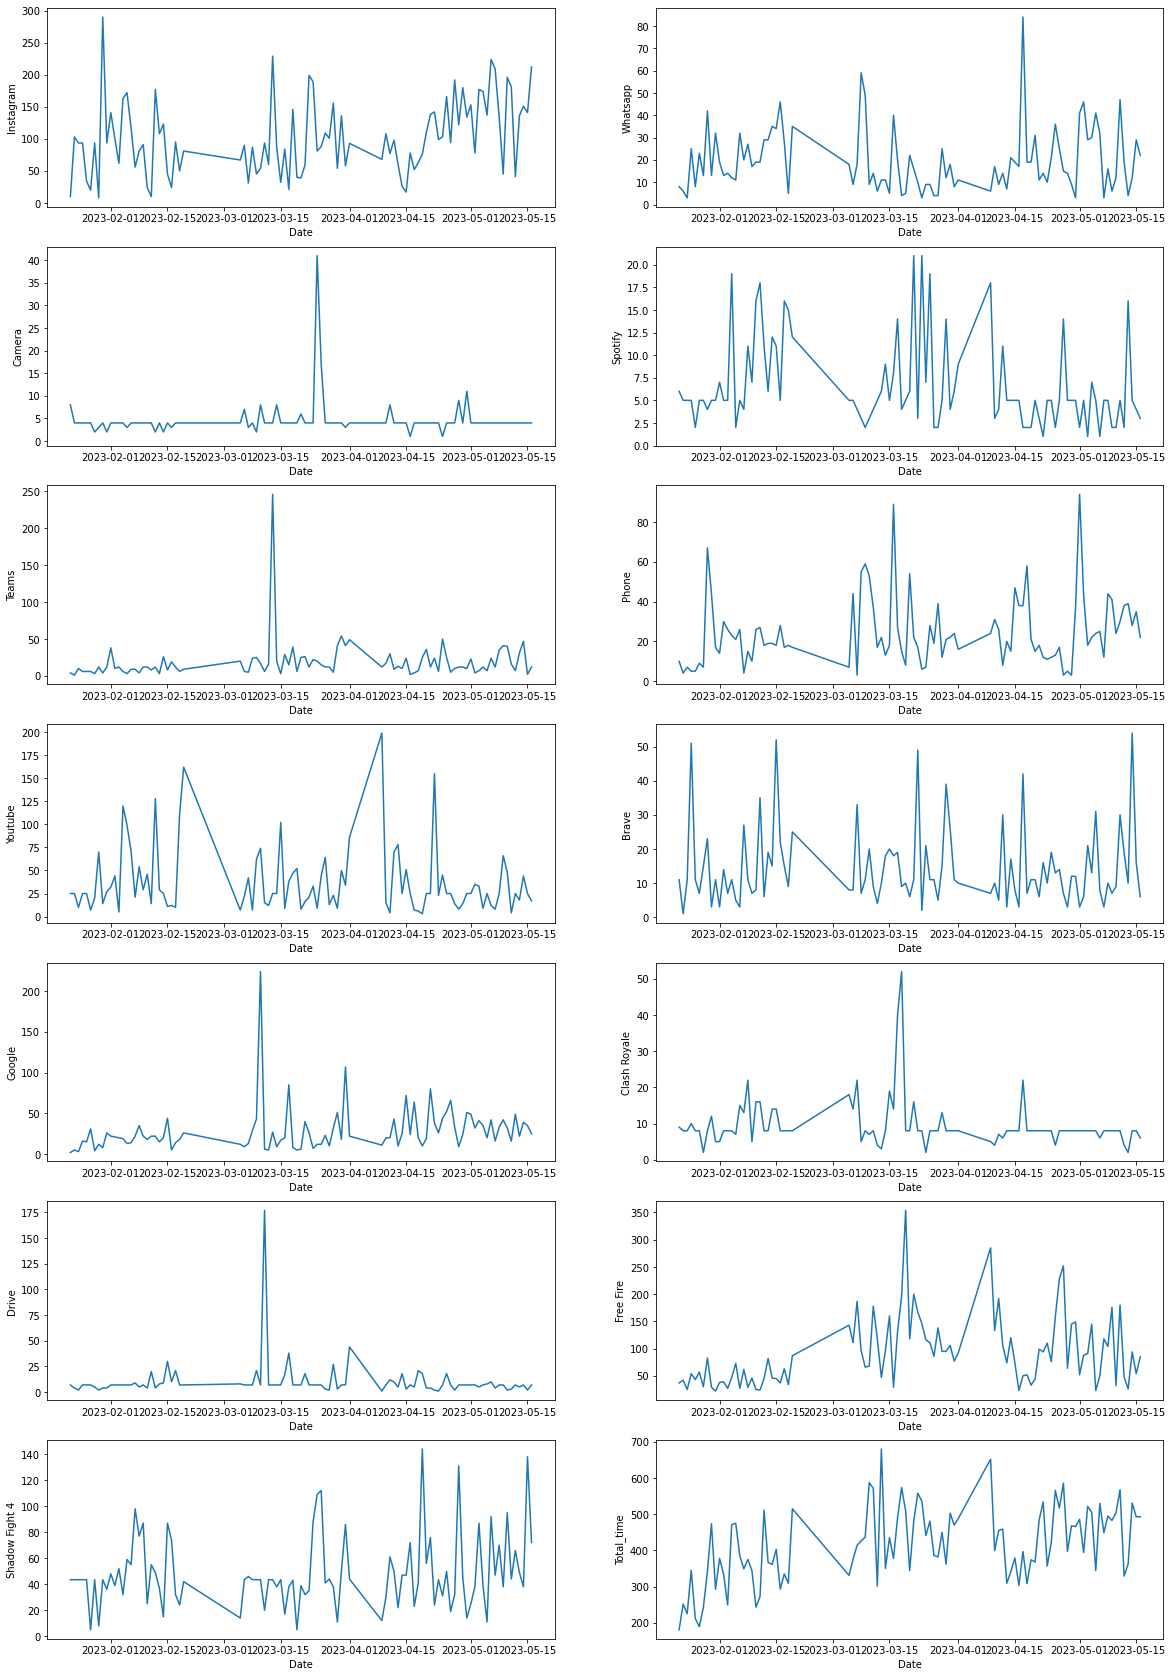

In [18]:
fig,axs=plt.subplots(7,2,figsize=(20,30))
j=1
a=df.columns
for z in range(0,7,1):
        for y in range(0,2,1):
            sns.lineplot(x=df['Date'],y=df[a[j]],ax=axs[z][y])
            j=j+1

### The day when mobile usage was highest

In [19]:
df[df['Total_time']==df['Total_time'].max()]

,Date,Instagram,Whatsapp,Camera,Spotify,Teams,Phone,Youtube,Brave,Google,Clash Royale,Drive,Free Fire,Shadow Fight 4,Total_time
37,2023-03-13,229.0,11,4.0,6.0,246.0,22,25.0,10.0,27.0,3.0,7.0,47,43.5,680.5


### The day when mobile usage was lowest 

In [20]:
df[df['Total_time']==df['Total_time'].min()]

,Date,Instagram,Whatsapp,Camera,Spotify,Teams,Phone,Youtube,Brave,Google,Clash Royale,Drive,Free Fire,Shadow Fight 4,Total_time
0,2023-01-22,10.0,8,8.0,6.0,4.0,10,25.0,11.0,2.0,9.0,7.0,37,43.5,180.5


### Displaying the days when usage for each app was highest

In [21]:
max_row = []
for col in df.iloc[:, 1:14]:
    max_value = df[col].max()
    max_row.append([df.loc[df[col] == max_value, 'Date'].iloc[0], col, max_value])

max_result_df = pd.DataFrame(max_row, columns=['Date', 'Column', 'Time used'])
print(max_result_df)

         Date          Column  Time used
0  2023-01-30       Instagram      290.0
1  2023-04-17        Whatsapp       84.0
2  2023-03-24          Camera       41.0
3  2023-03-21         Spotify       21.0
4  2023-03-13           Teams      246.0
5  2023-05-01           Phone       94.0
6  2023-04-09         Youtube      199.0
7  2023-05-14           Brave       54.0
8  2023-03-10          Google      224.0
9  2023-03-18    Clash Royale       52.0
10 2023-03-11           Drive      177.0
11 2023-03-19       Free Fire      354.0
12 2023-04-19  Shadow Fight 4      144.0


### Correlation

In [22]:
corr_matrix=df.corr()
corr_matrix

,Instagram,Whatsapp,Camera,Spotify,Teams,Phone,Youtube,Brave,Google,Clash Royale,Drive,Free Fire,Shadow Fight 4,Total_time
Instagram,1.000000,-0.060547,-0.054650,-0.103985,0.241976,-0.097038,-0.049829,-0.138948,-0.080631,-0.161851,-0.093660,0.014951,0.154637,0.560080
Whatsapp,-0.060547,1.000000,-0.179267,-0.157148,-0.084565,0.367560,-0.142444,0.276337,0.094005,0.064899,0.013584,-0.237948,-0.066668,-0.022983
Camera,-0.054650,-0.179267,1.000000,0.079475,-0.012101,-0.071047,-0.107719,0.021897,-0.024618,-0.116192,-0.026473,0.094257,0.289885,0.055348
Spotify,-0.103985,-0.157148,0.079475,1.000000,-0.009895,-0.155111,0.224484,0.033845,-0.096218,0.118764,0.017910,0.068940,-0.081706,0.029523
Teams,0.241976,-0.084565,-0.012101,-0.009895,1.000000,0.053240,-0.032106,-0.022106,0.066413,-0.085561,-0.028079,-0.041324,0.000888,0.357971
Phone,-0.097038,0.367560,-0.071047,-0.155111,0.053240,1.000000,-0.051919,-0.096779,0.232957,-0.031868,0.089613,-0.158531,-0.158560,0.074446
Youtube,-0.049829,-0.142444,-0.107719,0.224484,-0.032106,-0.051919,1.000000,-0.046465,0.066734,0.014848,-0.095854,0.113581,-0.191363,0.306512
Brave,-0.138948,0.276337,0.021897,0.033845,-0.022106,-0.096779,-0.046465,1.000000,0.152466,0.135738,0.012787,-0.019516,-0.061641,0.058068
Google,-0.080631,0.094005,-0.024618,-0.096218,0.066413,0.232957,0.066734,0.152466,1.000000,0.041469,-0.037657,-0.010587,0.005493,0.316713
Clash Royale,-0.161851,0.064899,-0.116192,0.118764,-0.085561,-0.031868,0.014848,0.135738,0.041469,1.000000,0.078238,0.134507,-0.092556,0.058193


### Heatmap to check if there is any correlation 

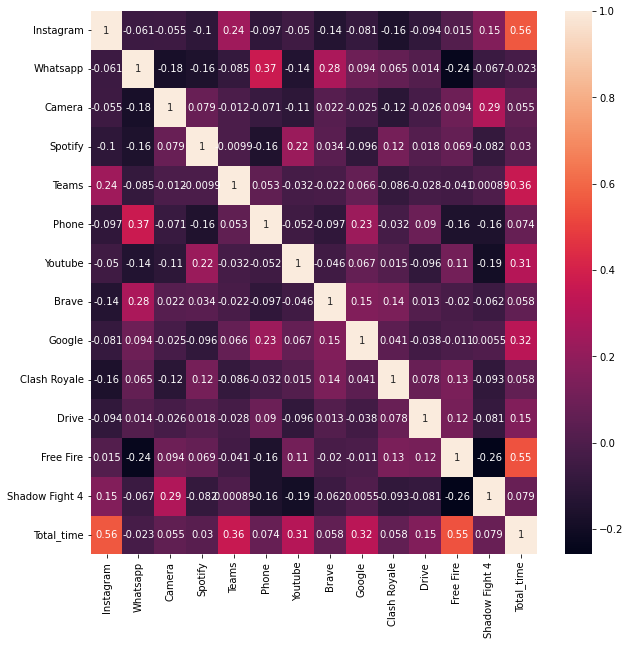

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()